In [694]:
#Importing python basics i.e pandas and numpy
import numpy as np 
import pandas as pd
df1=pd.read_excel('C:/Users/91868/Desktop/zomato_train.xlsx')

#copying the top 20 rows of the original dataframe for the easy EDA and model building in CPU.
df=df1.head(20)

df.isnull().sum()

#Analysing Reviews
#In this section we will go on to prepare reviews dataframe.
#We will extract reviews and ratings of each restaurant and create a dataframe with it.
from tqdm import tqdm
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED')
            score = float(score)
            all_ratings.append([name,score, doc])

#Creating a new Dataframe 'rating_df', for copying the above analysed data
import re
rating_df = pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))
rating_df

#Copying the 4 columns 'rest_type','dish_liked','cuisines','votes' to new dataframe df_ratings_add
columns = ['name','rest_type','dish_liked','cuisines','votes']
df_ratings_add = df[columns]
df_ratings_add

#merging the above 2 dataframes
result=pd.merge(rating_df, df_ratings_add, on="name")

result['rating'].dtype
result['rating'].value_counts()
result['rest_type'].value_counts()
result['rest_type'].dtype

20it [00:00, 2238.57it/s]


dtype('O')

In [695]:
#Converting the rating 'column' to 'sent', with creating sa new column(feature) 'sent'
def mod(x):
    if 2.0>int(x)>=1.0:
        return '1'
    if 3.0>int(x)>=2.0:
        return '2'
    if 4.0>int(x)>=3.0:
        return '3'
    if 5.0>int(x)>=4.0:
        return '4'
    if x==5.0:
        return '5'

result['sent']=result['rating'].apply(mod)

In [696]:
cols=['rating','sent']
result[cols]

,rating,sent
0,1.0,1
1,3.0,3
2,1.0,1
3,5.0,5
4,1.0,1
5,5.0,5
6,5.0,5
7,5.0,5
8,2.0,2
9,3.0,3


In [697]:
#Removing the punctuation_signs for the text columns
punctuation_signs = list("?:!.,;")

for punct_sign in punctuation_signs:
    result['cuisines'] = result['cuisines'].str.replace(punct_sign, '')
    result['dish_liked'] = result['dish_liked'].str.replace(punct_sign, '')
    result['review'] = result['review'].str.replace(punct_sign, '')
    result['rest_type'] = result['rest_type'].str.replace(punct_sign, '')

In [698]:
# #Removing the symbols \r, \n and others
col=['cuisines','dish_liked','review','rest_type']
for x in col:
    result[x] = result[x].str.replace("\r", " ")
    result[x] = result[x].str.replace("\n", " ")
    result[x] = result[x].str.replace("    ", " ")
    result[x] = result[x].str.replace('"', '')
    result[x] = result[x].str.lower()
    result[x] = result[x].dropna()
    result[x] = result[x].str.replace("'s", "")

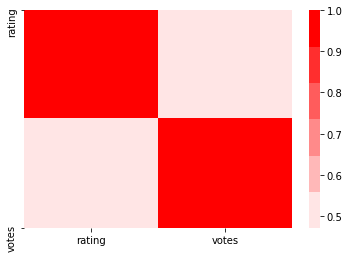

In [699]:
# find the corelation between inputs-'rating' and 'votes'.
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['rating','votes']
corr = result[num_cols].corr()

# plot heatmap
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap=sns.light_palette("red"),)
plt.show()

In [700]:
#As the feature 'review' is highly correleated to restaurants rating('sent')
#so, we have to process the 'review' feature for the model building.
#For 'review' column the actual need tokenization,stopwords removal, lemmatization
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

def preprocessing(review):
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemmas_tokens=[lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    final_tokens=final_tokens.join(lemmas_tokens)
    return final_tokens
result['review']=result['review'].apply(preprocessing)

In [701]:
result.dtypes

name           object
rating        float64
review         object
rest_type      object
dish_liked     object
cuisines       object
votes           int64
sent           object
dtype: object

In [702]:
#Assigning the above processed 'review' column is assigning to X for the model building.
#because, the review column will be analysed for the rating of restaurants.
X=result['review']

#assigning the 'sent' to y i.e target, which is rating column
y = result['sent']

X

0      u need reasonable food n want get cheated croo...
1                   beef biriyani didnt came expectation
2                                     awfully overpriced
3                                beef biriyani exquisite
4      new place take way point near makka musk every...
5      really great ambience experience bartender suj...
6      place great food really nice vegetarian girl a...
7      boozy griffin amazing lively place bartender s...
8      much overrated clumpsy noisy expensive ordered...
9      good place people looking craziness music pret...
10     loved drink ambience music awesome special tha...
11     place small always crowded wait lot get place ...
12     boozy griffin koramangala one happening place ...
13     boozy griffin nice place hang friend ambience ...
14     lively place young people beautiful light arou...
15     loud music heart koramangala courties staff go...
16     pretty groovy place though would say food spic...
17     love loud music searchin

In [703]:
#TFIDF vectorization of the above processed feature 'review'.
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter=TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X=tfidfconverter.fit_transform(X).toarray()

In [705]:
#Encoding the categorial columns
from sklearn.preprocessing import LabelEncoder
cols=['rest_type','cuisines']
for col in cols:
    le=LabelEncoder()
    result[col]=le.fit_transform(result[col])
new_df1=result[cols] #creating a new Dataframe

#converting X as Dataframe
X=pd.DataFrame(X)

#creating another new Dataframe
new_df2= pd.concat([X,new_df], axis=1)
new_df2['votes']=result['votes']

In [706]:
new_df2

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,rest_type,cuisines,votes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.294454,0.000000,0.475969,0.000000,0.000000,0.000000,9,0,13
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,0,13
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,0,13
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,0,13
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,0,13
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263961,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,5015
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,5015
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,5015
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,5015
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194697,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,5015


In [707]:
#model building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(new_df2, y, test_size=0.25, random_state=100)

In [708]:
#model evaluation
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of GradientBoostingClassifier on training set: 0.98
Accuracy of GradientBoostingClassifier on test set: 0.59
